In [1]:
import torch
import torch.optim as optim

In [2]:
#현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드를 설정
torch.manual_seed(1)

In [3]:
#X: 독립변수, 입력값
#y: 종속변수, 출력값
X = torch.FloatTensor([1, 2, 3])
y = torch.FloatTensor([2, 2.5, 3.5])

In [4]:
X

tensor([1., 2., 3.])

In [5]:
y

tensor([2.0000, 2.5000, 3.5000])

In [6]:
#곱해지는 값 w를 2.0으로 초기화
#학습을 통해 값이 변경되는 변수임을 명시(requires_grad = True)
w = torch.tensor([2.0], requires_grad = True)

In [7]:
w

tensor([2.], requires_grad=True)

In [8]:
#더해지는 값 b를 1.0으로 초기화
#학습을 통해 값이 변경되는 변수임을 명시
b = torch.tensor([1.0], requires_grad = True)

In [9]:
b

tensor([1.], requires_grad=True)

In [10]:
#X * w + b를 실행해서 예측값을 hypothesis에 대입
hypothesis = X * w + b
hypothesis

tensor([3., 5., 7.], grad_fn=<AddBackward0>)

In [11]:
#선형회귀 비용 함수를 계산해서 MSE에 대입
#torch.mean(): 평균을 계산(모두 더한 다음 데이터수로 나눔)
MSE = torch.mean((hypothesis - y) ** 2)
MSE

tensor(6.5000, grad_fn=<MeanBackward0>)

In [12]:
#optim.Adam([w, b]): 미분을 자동 계산하여 w, b를 수정할 객체 생성
#lr = 0.1: learning_rate를 0.1로 설정
optimizer = optim.Adam([w, b], lr = 0.1)

In [14]:
#1000번 반복해서 오차 제곱의 합이 0으로 수렴하는 w, b를 찾음
for i in range(1000):
    print("w=", w)
    print("b=", b)

    #예측값을 hypothesis에 대입
    hypothesis = X * w + b
    print("hypothesis=", hypothesis)
    #예측값 - 진짜값 제곱의 합을 데이터수로 나눈 cost 계산
    MSE = torch.mean((hypothesis - y) ** 2)
    print("MSE=", MSE)

    #MSE를 이용하고 미분을 계산하고 w, b를 업데이트
    optimizer.zero_grad()
    MSE.backward()
    optimizer.step()
    print("=" * 100)

w= tensor([2.], requires_grad=True)
b= tensor([1.], requires_grad=True)
hypothesis= tensor([3., 5., 7.], grad_fn=<AddBackward0>)
MSE= tensor(6.5000, grad_fn=<MeanBackward0>)
w= tensor([1.9000], requires_grad=True)
b= tensor([0.9000], requires_grad=True)
hypothesis= tensor([2.8000, 4.7000, 6.6000], grad_fn=<AddBackward0>)
MSE= tensor(5.0300, grad_fn=<MeanBackward0>)
w= tensor([1.8005], requires_grad=True)
b= tensor([0.8006], requires_grad=True)
hypothesis= tensor([2.6011, 4.4017, 6.2022], grad_fn=<AddBackward0>)
MSE= tensor(3.7599, grad_fn=<MeanBackward0>)
w= tensor([1.7021], requires_grad=True)
b= tensor([0.7023], requires_grad=True)
hypothesis= tensor([2.4044, 4.1066, 5.8087], grad_fn=<AddBackward0>)
MSE= tensor(2.6915, grad_fn=<MeanBackward0>)
w= tensor([1.6053], requires_grad=True)
b= tensor([0.6059], requires_grad=True)
hypothesis= tensor([2.2112, 3.8165, 5.4218], grad_fn=<AddBackward0>)
MSE= tensor(1.8238, grad_fn=<MeanBackward0>)
w= tensor([1.5109], requires_grad=True)
b= tensor(

In [16]:
import matplotlib.pyplot as plt

(0.0, 4.0)

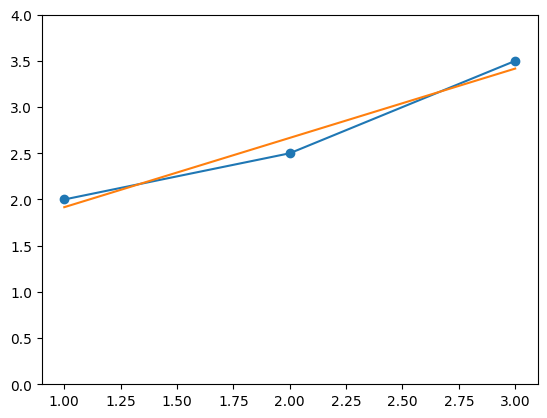

In [19]:
#X와 y값을 원모양 마커로 그래프로 그림
plt.plot(X, y, marker="o")

#hypothesis.detach().numpy(): 예측값 hypothesis를 numpy 배열로 변환
#X와 예측값 hypothesis사이에 붉은선(mfc = 'r'), 선모양은 실선(ls = "-")으로 그래프로 그림
plt.plot(X, hypothesis.detach().numpy(), mfc='r', ls="-")

#y 좌표의 범위: 0 ~ 4로 설정
plt.ylim(0, 4)

In [20]:
#학습을 토대로 값을 예측(X가 10일때, 20일때의 y값 예측)
print("X가 10일 때 y=", w * 10 + b)
print("X가 20일 때 y=", w * 20 + b)

X가 10일 때 y= tensor([8.6667], grad_fn=<AddBackward0>)
X가 20일 때 y= tensor([16.1667], grad_fn=<AddBackward0>)
